In [13]:
import pandas as pd
import numpy as np

df_uts = pd.read_csv(r'C:\Users\lenovo\Downloads\Projek UTS Gasal 20242025-20241016\Dataset UTS_Gasal 2425.csv')
df_uts.head(20)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [14]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

print("\nPengecekan nilai missing values (null, kosong, NaN):")
missing_values = df_uts.isnull().sum()
empty_strings = (df_uts == '').sum()
nan_values = df_uts.isna().sum()

print("\nMissing values per column:\n", missing_values)
print("\nKolom dengan string kosong:\n", empty_strings)
print("\nNaN values per column:\n", nan_values)

print("\nPengecekan outlier menggunakan metode IQR:")
df_uts_numeric = df_uts.select_dtypes(include=['number']) 

Q1 = df_uts_numeric.quantile(0.25)
Q3 = df_uts_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_uts_numeric < (Q1 - 1.5 * IQR)) | (df_uts_numeric > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier per column:\n", outliers)

duplicates = df_uts.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

categorical_columns = df_uts.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_uts[col] = le.fit_transform(df_uts[col].astype(str)) 
    label_encoders[col] = le

print("\nData setelah diubah menjadi numerik:\n", df_uts.head())

target = 'price'
class_distribution = df_uts[target].value_counts()
print("\nDistribusi kelas:\n", class_distribution)

X = df_uts.drop(columns=[target])
y = df_uts[target]

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}: {len(train_index)} data latih, {len(test_index)} data uji")
target = 'price' 

features_to_drop = ['category']

X = df_uts.drop(columns=features_to_drop)
y = df_uts[target]

print("\nFitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

print("\nFitur (X) setelah penghapusan kolom Kategori:\n", X.head())
print("\nTarget (y):\n", y.head())

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}: {len(train_index)} data latih, {len(test_index)} data uji")


Pengecekan nilai missing values (null, kosong, NaN):

Missing values per column:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Kolom dengan string kosong:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

NaN values per column:
 squareme

In [15]:
df_uts2 = X.copy()
df_uts2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,0,1,63,9373,3,8,2005,1,1,4313,9005,956,0,7,7559081.5
1,55712,58,0,1,19,34457,6,8,2021,1,0,2937,8852,135,1,9,5574642.1
2,86929,100,1,0,11,98155,3,4,2003,0,0,6326,4748,654,0,10,8696869.3
3,51522,3,0,0,61,9047,8,3,2012,0,1,632,5792,807,1,5,5154055.2
4,96470,74,1,0,21,92029,4,2,2011,0,1,5414,1172,716,1,9,9652258.1
5,79770,3,0,1,69,54812,10,5,2018,1,1,8871,7117,240,0,7,7986665.8
6,75985,60,1,0,67,6517,6,9,2009,0,1,4878,281,384,1,5,7607322.9
7,64169,88,0,1,6,61711,3,9,2011,0,1,3054,129,726,0,9,6420823.1
8,92383,12,0,0,78,71982,3,7,2000,1,0,7507,9056,892,1,1,9244344.0
9,95121,46,0,1,3,9382,7,9,1994,1,0,615,1221,328,0,10,9515440.4


In [16]:
from sklearn.model_selection import train_test_split

def train_test_split_custom(X, y, test_size, random_state=99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print(f"\nTrain-test split dengan rasio {int((1 - test_size) * 100)}:{int(test_size * 100)}")
    print(f"Jumlah data latih: {len(X_train)}")
    print(f"Jumlah data uji: {len(X_test)}\n")

    return X_train, X_test, y_train, y_test

split_ratios = [0.2, 0.25, 0.3]

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=ratio, random_state=99)


Train-test split dengan rasio 80:20
Jumlah data latih: 8000
Jumlah data uji: 2000


Train-test split dengan rasio 75:25
Jumlah data latih: 7500
Jumlah data uji: 2500


Train-test split dengan rasio 70:30
Jumlah data latih: 7000
Jumlah data uji: 3000



In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pipe_Lasso = Pipeline(steps=[
            ('scalers', FeatureUnion(transformer_list=[
                ('standard_scaler', StandardScaler()),
                ('minmax_scaler', MinMaxScaler())
            ])),
            ('feature_selection', 'passthrough'),
            ('reg', Lasso(max_iter=1000))
            ])

param_grid_Lasso = [
    {
        'feature_selection': [SelectKBest(score_func=f_regression)],
        'feature_selection__k': np.arange(1, 20),
        'reg__alpha': [0.01, 0.1, 1, 10, 100]
    },
    {
        'feature_selection': [SelectPercentile(score_func=f_regression)],
        'feature_selection__percentile': np.arange(10, 101, 10),
        'reg__alpha': [0.01, 0.1, 1, 10, 100]
    }
]

GSCV_Lasso = GridSearchCV(pipe_Lasso, param_grid_Lasso, cv=5, scoring='neg_mean_squared_error')

GSCV_Lasso.fit(X_train, y_train)

print("Best model: {}".format(GSCV_Lasso.best_estimator_))
print("Lasso best parameters: {}".format(GSCV_Lasso.best_params_))
print("Koefisien/bobot: {}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias: {}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].intercept_))

Lasso_predict = GSCV_Lasso.predict(X_test)

mse_Lasso = mean_squared_error(y_test, Lasso_predict)
mae_Lasso = mean_absolute_error(y_test, Lasso_predict)

print("Lasso Mean Squared Error (MSE): {}".format(mse_Lasso))
print("Lasso Mean Absolute Error (MAE): {}".format(mae_Lasso))
print("Lasso Root Mean Squared Error: {}".format(np.sqrt(mse_Lasso)))

Best model: Pipeline(steps=[('scalers',
                 FeatureUnion(transformer_list=[('standard_scaler',
                                                 StandardScaler()),
                                                ('minmax_scaler',
                                                 MinMaxScaler())])),
                ('feature_selection',
                 SelectKBest(k=1,
                             score_func=<function f_regression at 0x000001E77F84E7A0>)),
                ('reg', Lasso(alpha=1))])
Lasso best parameters: {'feature_selection': SelectKBest(score_func=<function f_regression at 0x000001E77F84E7A0>), 'feature_selection__k': 1, 'reg__alpha': 1}
Koefisien/bobot: [2891625.29964904]
Intercept/bias: 4993654.656085714
Lasso Mean Squared Error (MSE): 10607646.880656686
Lasso Mean Absolute Error (MAE): 2631.2525581931204
Lasso Root Mean Squared Error: 3256.9382678608886


In [18]:
df_results = pd.DataFrame(y_test, columns=['price'])
df_results = pd.DataFrame(y_test)
df_results['Lasso Prediction'] = Lasso_predict

df_results['Selisih_LR'] = df_results['Lasso Prediction'] - df_results['price']

df_results.head()

,price,Lasso Prediction,Selisih_LR
7653,2696414.4,2.694511e+06,-1903.391681
7865,4919606.6,4.919999e+06,392.797503
3226,8974887.0,8.975078e+06,191.241348
5912,923577.4,9.231203e+05,-457.149982
8237,2474395.5,2.475012e+06,616.653488


In [19]:
df_results.describe()

,price,Lasso Prediction,Selisih_LR
count,3.000000e+03,3.000000e+03,3000.000000
mean,4.992964e+06,4.992846e+06,-117.970854
std,2.843994e+06,2.843996e+06,3255.343635
min,1.322910e+04,1.872497e+04,-12063.881795
25%,2.625738e+06,2.624536e+06,-2265.515381
50%,5.012312e+06,5.010099e+06,116.527758
75%,7.440587e+06,7.441861e+06,2270.098818
max,9.994093e+06,9.999573e+06,6050.489550


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pipe_RF = Pipeline(steps=[
            ('scalers', FeatureUnion(transformer_list=[
                ('standard_scaler', StandardScaler()),
                ('minmax_scaler', MinMaxScaler())
            ])),
            ('feature_selection', 'passthrough'),
            ('reg', RandomForestRegressor())
            ])

param_grid_RF = [
    {
        'feature_selection': [SelectKBest(score_func=f_regression)],
        'feature_selection__k': np.arange(1, 20),
        'reg__n_estimators': [10, 50, 100, 200],
        'reg__max_depth': [None, 5, 10, 20]
    },
    {
        'feature_selection': [SelectPercentile(score_func=f_regression)],
        'feature_selection__percentile': np.arange(10, 101, 10),
        'reg__n_estimators': [10, 50, 100, 200],
        'reg__max_depth': [None, 5, 10, 20]
    }
]

GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, scoring='neg_mean_squared_error')

GSCV_RF.fit(X_train, y_train)

print("Best model: {}".format(GSCV_RF.best_estimator_))
print("RF best parameters: {}".format(GSCV_RF.best_params_))
print("Feature Importances: {}".format(GSCV_RF.best_estimator_.named_steps['reg'].feature_importances_))

RF_predict = GSCV_RF.predict(X_test)

mse_RF = mean_squared_error(y_test, RF_predict)
mae_RF = mean_absolute_error(y_test, RF_predict)

print("RF Mean Squared Error (MSE): {}".format(mse_RF))
print("RF Mean Absolute Error (MAE): {}".format(mae_RF))
print("RF Root Mean Squared Error: {}".format(np.sqrt(mse_RF)))

Best model: Pipeline(steps=[('scalers',
                 FeatureUnion(transformer_list=[('standard_scaler',
                                                 StandardScaler()),
                                                ('minmax_scaler',
                                                 MinMaxScaler())])),
                ('feature_selection',
                 SelectPercentile(percentile=100,
                                  score_func=<function f_regression at 0x000001E77F84E7A0>)),
                ('reg', RandomForestRegressor(max_depth=20, n_estimators=200))])
RF best parameters: {'feature_selection': SelectPercentile(score_func=<function f_regression at 0x000001E77F84E7A0>), 'feature_selection__percentile': 100, 'reg__max_depth': 20, 'reg__n_estimators': 200}
Feature Importances: [1.78574007e-01 3.01261725e-08 7.35168272e-09 6.98636813e-09
 2.92835821e-08 2.86748647e-08 2.10069815e-08 2.24271275e-08
 2.70256191e-08 7.59666315e-09 7.25342109e-09 2.99817291e-08
 3.02621619e-08 2.

In [21]:
df_results['RF Prediction'] = RF_predict
df_results = pd.DataFrame(y_test)
df_results['RF Prediction'] = RF_predict

df_results['Selisih_price_RF'] = df_results['RF Prediction'] - df_results['price']
df_results.head()

,price,RF Prediction,Selisih_price_RF
7653,2696414.4,2.695541e+06,-873.5765
7865,4919606.6,4.921047e+06,1440.1400
3226,8974887.0,8.975361e+06,474.2490
5912,923577.4,9.233424e+05,-234.9640
8237,2474395.5,2.474390e+06,-5.4320


In [22]:
df_results.describe()

,price,RF Prediction,Selisih_price_RF
count,3.000000e+03,3.000000e+03,3000.000000
mean,4.992964e+06,4.992884e+06,-80.668128
std,2.843994e+06,2.843953e+06,1683.414188
min,1.322910e+04,1.584103e+04,-7327.859000
25%,2.625738e+06,2.624875e+06,-1058.850750
50%,5.012312e+06,5.011913e+06,-46.319750
75%,7.440587e+06,7.441299e+06,936.957875
max,9.994093e+06,9.997331e+06,6541.208000


In [23]:
import pandas as pd

df_results = pd.DataFrame({
    'Harga Asli': y_test,
    'Lasso Prediction': Lasso_predict,
    'RF Prediction': RF_predict
})

df_results['Lasso Difference'] = df_results['Lasso Prediction'] - df_results['Harga Asli']
df_results['RF Difference'] = df_results['RF Prediction'] - df_results['Harga Asli']

print(df_results.head())

      Harga Asli  Lasso Prediction  RF Prediction  Lasso Difference  \
7653   2696414.4      2.694511e+06   2.695541e+06      -1903.391681   
7865   4919606.6      4.919999e+06   4.921047e+06        392.797503   
3226   8974887.0      8.975078e+06   8.975361e+06        191.241348   
5912    923577.4      9.231203e+05   9.233424e+05       -457.149982   
8237   2474395.5      2.475012e+06   2.474390e+06        616.653488   

      RF Difference  
7653      -873.5765  
7865      1440.1400  
3226       474.2490  
5912      -234.9640  
8237        -5.4320  


In [24]:
lasso_feature_count = np.sum(GSCV_Lasso.best_estimator_.named_steps['feature_selection'].get_support())

rf_feature_count = np.sum(GSCV_RF.best_estimator_.named_steps['feature_selection'].get_support())

performance_comparison = {
    'Model': ['Lasso', 'Random Forest'],
    'Mean Absolute Error (MAE)': [mae_Lasso, mae_RF],
    'Mean Squared Error (MSE)': [mse_Lasso, mse_RF],
    'Root Mean Squared Error (RMSE)': [np.sqrt(mse_Lasso), np.sqrt(mse_RF)],
    'Number of Features': [lasso_feature_count, rf_feature_count]
}

df_performance = pd.DataFrame(performance_comparison)

print(df_performance)

           Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0          Lasso                2631.252558              1.060765e+07   
1  Random Forest                1294.303128              2.839446e+06   

   Root Mean Squared Error (RMSE)  Number of Features  
0                     3256.938268                   1  
1                     1685.065592                  34  


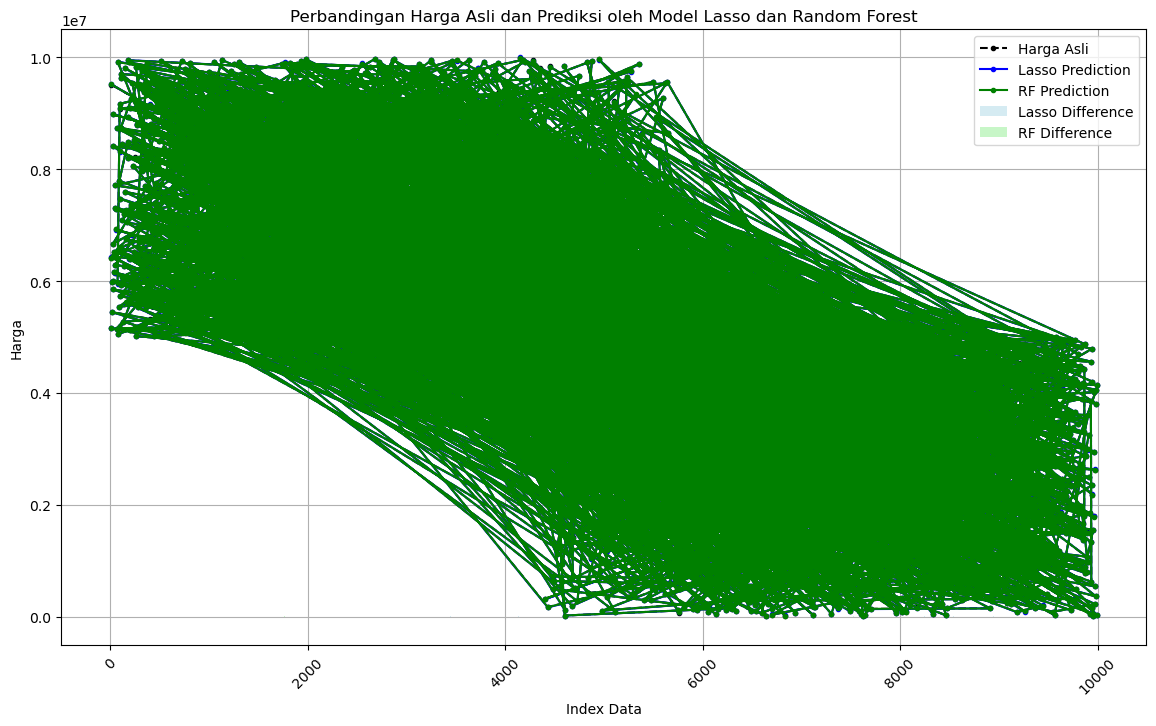

In [25]:
import matplotlib.pyplot as plt

df_results.set_index(df_results.index, inplace=True)

plt.figure(figsize=(14, 8))

plt.plot(df_results['Harga Asli'], label='Harga Asli', color='black', linestyle='--', marker='o', markersize=3)

plt.plot(df_results['Lasso Prediction'], label='Lasso Prediction', color='blue', linestyle='-', marker='o', markersize=3)

plt.plot(df_results['RF Prediction'], label='RF Prediction', color='green', linestyle='-', marker='o', markersize=3)

plt.bar(df_results.index, df_results['Lasso Difference'], color='lightblue', alpha=0.5, label='Lasso Difference', width=0.4)
plt.bar(df_results.index + 0.4, df_results['RF Difference'], color='lightgreen', alpha=0.5, label='RF Difference', width=0.4)

plt.title('Perbandingan Harga Asli dan Prediksi oleh Model Lasso dan Random Forest')
plt.xlabel('Index Data')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

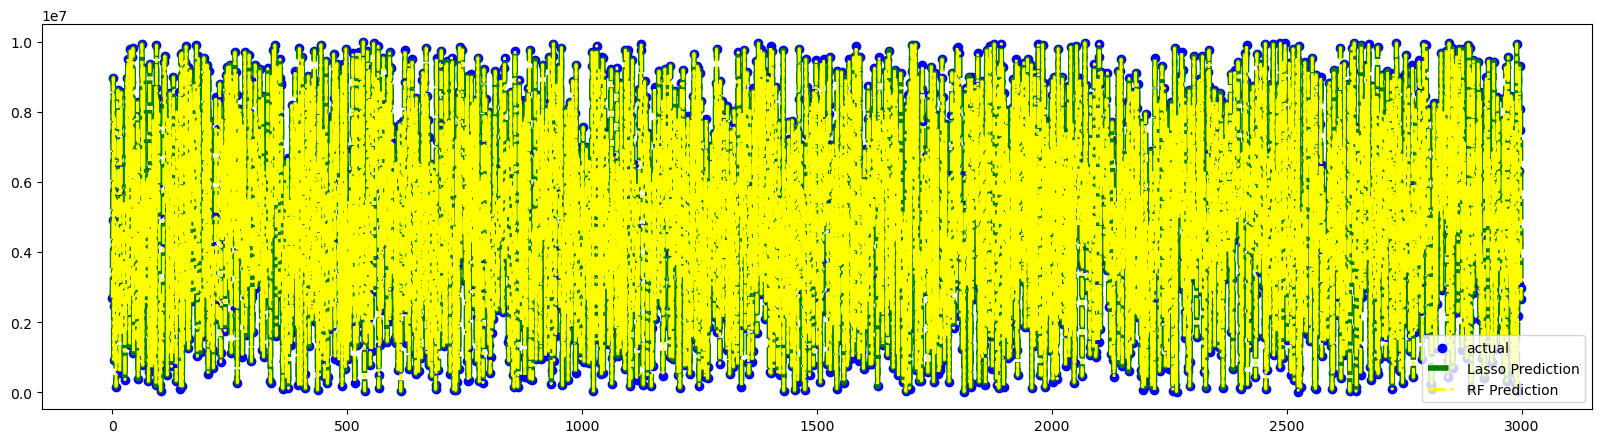

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
data_len = range(len(y_test))
plt.scatter(data_len, df_results['Harga Asli'], label="actual", color="blue")
plt.plot(data_len, df_results['Lasso Prediction'], label="Lasso Prediction", color="green", linewidth=4, linestyle="dashed")
plt.plot(data_len, df_results['RF Prediction'], label="RF Prediction", color="yellow", linewidth=2, linestyle="-.")
plt.legend()
plt.show